## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

/Users/xeinos/anaconda2/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/Users/xeinos/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/xeinos/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


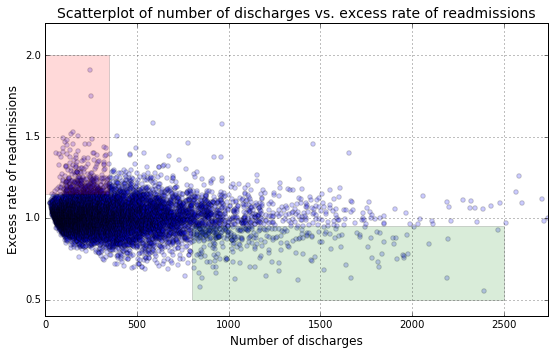

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
dfh = clean_hospital_read_df
dfh.columns

Index([u'Hospital Name', u'Provider Number', u'State', u'Measure Name',
       u'Number of Discharges', u'Footnote', u'Excess Readmission Ratio',
       u'Predicted Readmission Rate', u'Expected Readmission Rate',
       u'Number of Readmissions', u'Start Date', u'End Date'],
      dtype='object')

In [7]:
dfh.tail(15)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
3202,METHODIST HEALTHCARE MEMPHIS HOSPITALS,440049,TN,READM-30-HF-HRRP,2388,NaN,1.0571,23.5,22.2,564.0,07/01/2010,06/30/2013
13730,HOAG ORTHOPEDIC INSTITUTE,50769,CA,READM-30-HIP-KNEE-HRRP,2393,NaN,0.5495,2.7,4.9,54.0,07/01/2010,06/30/2013
2440,FLORIDA HOSPITAL,100007,FL,READM-30-PN-HRRP,2430,NaN,1.0738,18.6,17.3,456.0,07/01/2010,06/30/2013
11545,"MCBRIDE CLINIC ORTHOPEDIC HOSPITAL, L L C",370222,OK,READM-30-HIP-KNEE-HRRP,2469,NaN,0.9248,4.5,4.9,110.0,07/01/2010,06/30/2013
1805,NEW YORK-PRESBYTERIAN HOSPITAL,330101,NY,READM-30-HF-HRRP,2476,NaN,1.0925,24.8,22.7,619.0,07/01/2010,06/30/2013
8818,"CHRISTIANA CARE HEALTH SERVICES, INC.",80001,DE,READM-30-HF-HRRP,2509,NaN,0.9712,21.8,22.5,546.0,07/01/2010,06/30/2013
572,"SOUTHCOAST HOSPITAL GROUP, INC",220074,MA,READM-30-COPD-HRRP,2565,NaN,1.1637,23.7,20.4,619.0,07/01/2010,06/30/2013
136,"BEAUMONT HOSPITAL, ROYAL OAK",230130,MI,READM-30-HIP-KNEE-HRRP,2581,NaN,1.2577,7.5,5.9,197.0,07/01/2010,06/30/2013
1698,FLORIDA HOSPITAL,100007,FL,READM-30-HIP-KNEE-HRRP,2596,NaN,1.0962,5.6,5.1,147.0,07/01/2010,06/30/2013
1242,FLORIDA HOSPITAL,100007,FL,READM-30-COPD-HRRP,2705,NaN,1.1148,22.0,19.7,603.0,07/01/2010,06/30/2013


In [12]:
dfh['Number of Discharges'].describe((.05, .5, .95))

count    11578.000000
mean       362.909397
std        309.176945
min          0.000000
5%          73.000000
50%        280.000000
95%        930.000000
max       6793.000000
Name: Number of Discharges, dtype: float64

In [11]:
dfh['Number of Readmissions'].describe()

count    11497.000000
mean        63.633731
std         59.540296
min         11.000000
25%               NaN
50%               NaN
75%               NaN
max        879.000000
Name: Number of Readmissions, dtype: float64

In [32]:
smdfh = dfh[(dfh['Number of Discharges'] <= 930)]
smdfh = smdfh[(smdfh['Number of Discharges'] >= 73)]

In [36]:
smdfh.head(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
3129,UNIVERSITY OF LOUISVILLE HOSPITAL,180141,KY,READM-30-PN-HRRP,73,NaN,1.0584,19.8,18.7,18.0,07/01/2010,06/30/2013
3159,UPMC ST MARGARET,390102,PA,READM-30-AMI-HRRP,73,NaN,1.0578,23.0,21.8,20.0,07/01/2010,06/30/2013
6320,NORTH TEXAS MEDICAL CENTER,450090,TX,READM-30-COPD-HRRP,73,NaN,1.0051,21.4,21.3,16.0,07/01/2010,06/30/2013
2510,LAC+USC MEDICAL CENTER,50373,CA,READM-30-HF-HRRP,73,NaN,1.0721,23.2,21.6,21.0,07/01/2010,06/30/2013
8458,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",30111,AZ,READM-30-HF-HRRP,73,NaN,0.9764,21.1,21.6,14.0,07/01/2010,06/30/2013


In [34]:
len(smdfh)

10436

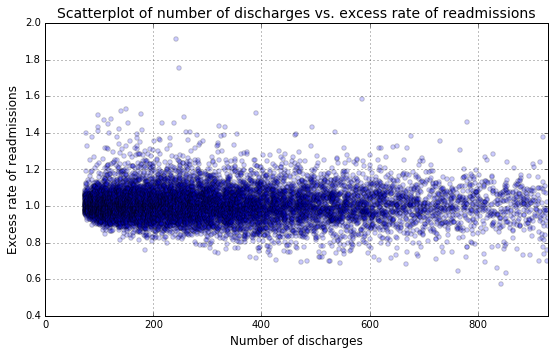

In [35]:
x = [a for a in smdfh['Number of Discharges']]
y = list(smdfh['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()